# Final project

Blair Lee, Benjamin Liu

Professor Kassab

## Imports and configuration

In [34]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import models, layers, callbacks

In [35]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Data exploration

Each row corresponds to a 28x28 greyscale image of an article of clothing. There are 784 features, each corresponding to the shade of a single pixel of this object. The values of each feature range from 0-255, from white to black on a scale of gray. Our target variable is a label from 0 to 9 which corresponds to a type of clothing.

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Let's see what a few of these images look like:

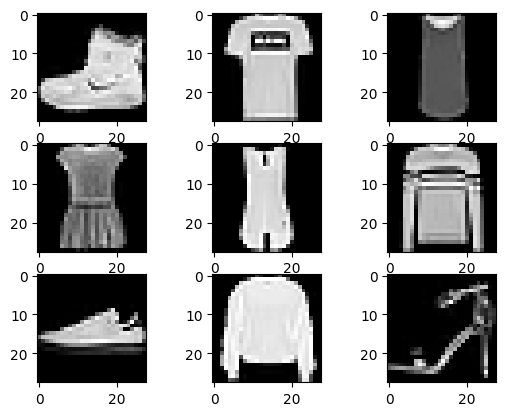

In [37]:
for i in range(9):
	plt.subplot(331 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

Let's normalize every value of the pixel intensities to be between [0, 1] from [0, 255]. We can do this by just dividing through by 255.

In [38]:
X_train = X_train / 255
X_test = X_test / 255

Instead of implementing our layers from scratch, we will be using the keras Sequential() environment.

In [39]:
model = models.Sequential()

We will be using the following layers:
* ReLU with 32 feature maps, convolutional
* 2x2 pooling
* ReLU with 64 feature maps, convolutional
* 2x2 pooling
* Flatten
* ReLU with 128 neurons, fully connected
* 50% Dropout
* Softmax with 10 neurons, fully connected, which generates our prediction

In [40]:
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPool2D(pool_size = (2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(256, activation = 'relu'))

model.add(layers.Dropout(0.2))

model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 256)              

## Training

In [41]:
# Only edit these variables, don't hard code anything!
EARLY_STOPPING_THRESHOLD = 10
NUM_BATCHES = 20
NUM_EPOCHS = 100
TEST_SIZE = 0.2

In [42]:
early_stoppage_rule = callbacks.EarlyStopping(patience = EARLY_STOPPING_THRESHOLD)
batch_size = X_train.shape[0] // NUM_BATCHES

model.compile(
    optimizer = 'Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

train_result = model.fit(X_train,
                         y_train,
                         batch_size = batch_size,
                         epochs = NUM_EPOCHS,
                         callbacks = [early_stoppage_rule],
                         validation_split = TEST_SIZE)

Epoch 1/100
16/16 [==============================] - 4s 251ms/step - loss: 1.4635 - accuracy: 0.5446 - val_loss: 0.7647 - val_accuracy: 0.7192
Epoch 2/100
16/16 [==============================] - 4s 235ms/step - loss: 0.7583 - accuracy: 0.7183 - val_loss: 0.6275 - val_accuracy: 0.7710
Epoch 3/100
16/16 [==============================] - 4s 237ms/step - loss: 0.6139 - accuracy: 0.7689 - val_loss: 0.5473 - val_accuracy: 0.7932
Epoch 4/100
16/16 [==============================] - 4s 239ms/step - loss: 0.5396 - accuracy: 0.7996 - val_loss: 0.4998 - val_accuracy: 0.8169
Epoch 5/100
16/16 [==============================] - 4s 234ms/step - loss: 0.4939 - accuracy: 0.8201 - val_loss: 0.4703 - val_accuracy: 0.8288
Epoch 6/100
16/16 [==============================] - 4s 240ms/step - loss: 0.4625 - accuracy: 0.8317 - val_loss: 0.4367 - val_accuracy: 0.8445
Epoch 7/100
16/16 [==============================] - 4s 234ms/step - loss: 0.4334 - accuracy: 0.8449 - val_loss: 0.4244 - val_accuracy: 0.8466

## Analyzing Results

We can plot a loss curve:

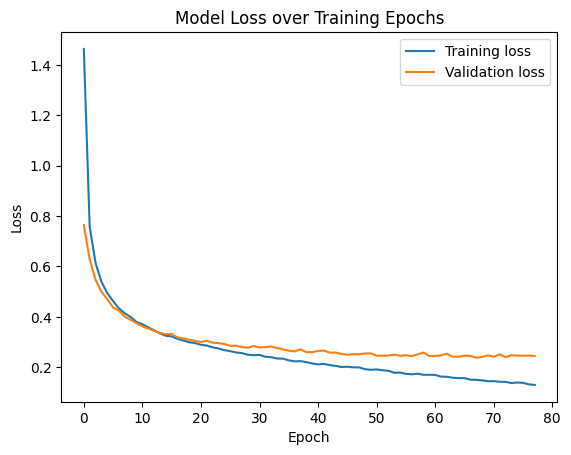

In [43]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title('Model Loss over Training Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

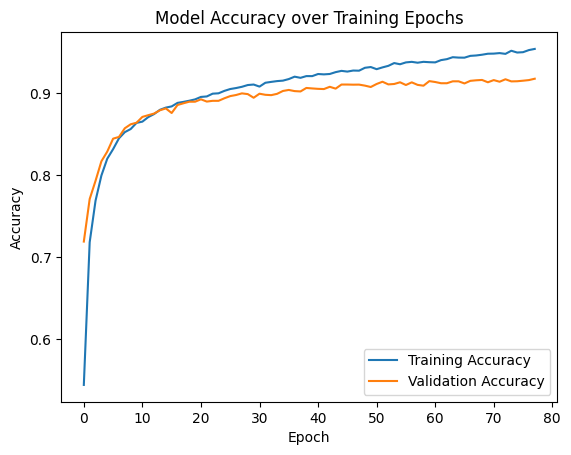

In [44]:
plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title('Model Accuracy over Training Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

## Results

We get an accuracy of 91% for our model evaluated on the true out-of-sample test set.

In [45]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2586 - accuracy: 0.9103


[0.2586131691932678, 0.9103000164031982]

313/313 [==============================] - 1s 2ms/step


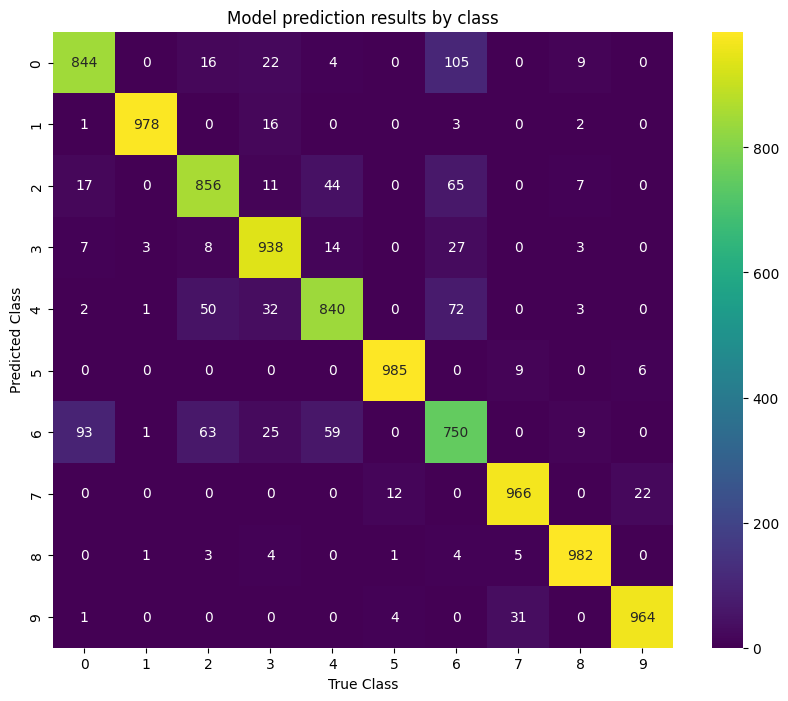

In [48]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
confusion = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize = (10, 8))
sns.heatmap(confusion, annot = True, fmt = 'd', cmap = 'viridis')
plt.title('Model prediction results by class')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()

We see that our biggest issues are with class 6, which tends to be misclassified as class 0 and vice versa. We can use classification_report to see exactly what these classes are.

In [47]:
class_names = ["Class 0 : T-shirt",
               "Class 1 : Trouser",
               "Class 2 : Pullover",
               "Class 3 : Dress",
               "Class 4 : Coat",
               "Class 5 : Sandal",
               "Class 6 : Shirt",
               "Class 7 : Sneaker",
               "Class 8 : Bag",
               "Class 9 : Ankle Boot"]

print(classification_report(y_test, y_pred_classes, target_names = class_names))

                      precision    recall  f1-score   support

   Class 0 : T-shirt       0.87      0.84      0.86      1000
   Class 1 : Trouser       0.99      0.98      0.99      1000
  Class 2 : Pullover       0.86      0.86      0.86      1000
     Class 3 : Dress       0.90      0.94      0.92      1000
      Class 4 : Coat       0.87      0.84      0.86      1000
    Class 5 : Sandal       0.98      0.98      0.98      1000
     Class 6 : Shirt       0.73      0.75      0.74      1000
   Class 7 : Sneaker       0.96      0.97      0.96      1000
       Class 8 : Bag       0.97      0.98      0.97      1000
Class 9 : Ankle Boot       0.97      0.96      0.97      1000

            accuracy                           0.91     10000
           macro avg       0.91      0.91      0.91     10000
        weighted avg       0.91      0.91      0.91     10000



We see that we are mixing T-shirt and shirt, which is somewhat understandable as the main source of our error.